In [56]:
import mat73
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from data._utils import ROOT_DIR, load_Nichols2017
from preprocess._utils import smooth_data_preprocess, reshape_calcium_data


In [2]:
dataset = load_Nichols2017()
source_path = os.path.join(ROOT_DIR, "opensource_data")


In [29]:
for key in dataset["worm0"].keys():
    print(key)

dataset
worm
calcium_data
smooth_calcium_data
residual_calcium
smooth_residual_calcium
neuron_to_idx
idx_to_neuron
max_time
time_in_seconds
dt
num_neurons
num_named_neurons
num_unknown_neurons
named_neurons_mask
unknown_neurons_mask
neurons_mask
named_neuron_to_idx
idx_to_named_neuron
unknown_neuron_to_idx
idx_to_unknown_neuron
slot_to_named_neuron
named_neuron_to_slot
slot_to_unknown_neuron
unknown_neuron_to_slot
slot_to_neuron
neuron_to_slot


In [26]:
dataset["worm0"]["named_neuron_to_slot"]

{'ADAL': 0,
 'ADAR': 1,
 'ADEL': 2,
 'ADER': 3,
 'ADFL': 4,
 'ADFR': 5,
 'ADLL': 6,
 'ADLR': 7,
 'AFDL': 8,
 'AFDR': 9,
 'AIAL': 10,
 'AIAR': 11,
 'AIBL': 12,
 'AIBR': 13,
 'AIML': 14,
 'AIMR': 15,
 'AINL': 16,
 'AINR': 17,
 'AIYL': 18,
 'AIYR': 19,
 'AIZL': 20,
 'AIZR': 21,
 'ALA': 22,
 'ALML': 23,
 'ALMR': 24,
 'ALNL': 25,
 'ALNR': 26,
 'AQR': 27,
 'AS1': 28,
 'AS10': 29,
 'AS11': 30,
 'AS2': 31,
 'AS3': 32,
 'AS4': 33,
 'AS5': 34,
 'AS6': 35,
 'AS7': 36,
 'AS8': 37,
 'AS9': 38,
 'ASEL': 39,
 'ASER': 40,
 'ASGL': 41,
 'ASGR': 42,
 'ASHL': 43,
 'ASHR': 44,
 'ASIL': 45,
 'ASIR': 46,
 'ASJL': 47,
 'ASJR': 48,
 'ASKL': 49,
 'ASKR': 50,
 'AUAL': 51,
 'AUAR': 52,
 'AVAL': 53,
 'AVAR': 54,
 'AVBL': 55,
 'AVBR': 56,
 'AVDL': 57,
 'AVDR': 58,
 'AVEL': 59,
 'AVER': 60,
 'AVFL': 61,
 'AVFR': 62,
 'AVG': 63,
 'AVHL': 64,
 'AVHR': 65,
 'AVJL': 66,
 'AVJR': 67,
 'AVKL': 68,
 'AVKR': 69,
 'AVL': 70,
 'AVM': 71,
 'AWAL': 72,
 'AWAR': 73,
 'AWBL': 74,
 'AWBR': 75,
 'AWCL': 76,
 'AWCR': 77,
 'BAGL': 7

In [27]:
dataset["worm0"]["named_neuron_to_idx"]

{'AFDR': 95,
 'ALA': 96,
 'AQR': 97,
 'ASKL': 98,
 'AUAL': 99,
 'AUAR': 100,
 'AVAL': 101,
 'AVFL': 102,
 'AVFR': 103,
 'BAGL': 104,
 'BAGR': 105,
 'DB2': 106,
 'IL2DL': 107,
 'RID': 108,
 'RIS': 109,
 'RMED': 110,
 'RMEV': 111,
 'URXL': 112,
 'URYDL': 113,
 'URYDR': 114,
 'VB1': 115,
 'VB2': 116}

In [22]:
calcium_data = dataset["worm0"]["calcium_data"]
calcium_data.shape


torch.Size([4224, 302])

In [25]:
dataset["worm0"]["named_neuron_to_slot"]["AVAL"]

53

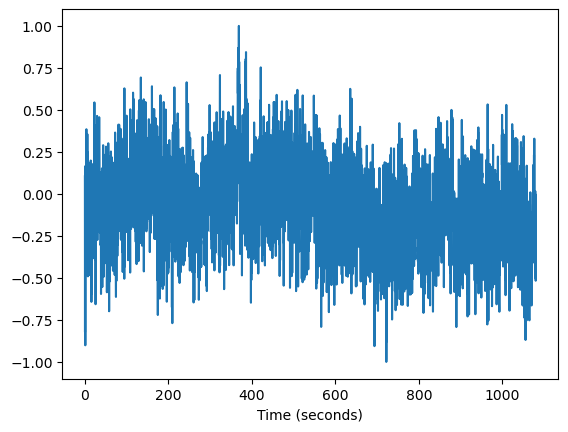

In [23]:
plt.figure()
plt.plot(dataset["worm0"]["time_in_seconds"], 
         calcium_data[:,53]) 
plt.xlabel("Time (seconds)")
plt.show()

In [85]:
# 'n2_prelet' : prelathargic = awake
# 'n2_let' : lathargic = asleep
# load the second .mat file
arr = mat73.loadmat(os.path.join(source_path, "Nichols2017", "n2_let.mat"))[
    "n2_let"
]

In [86]:
for key in arr.keys():
    print(key)

FiveStates
FourStates
IDs
dataset
fps
stimulus
timeVectorSeconds
traces
tracesDif


In [87]:
all_IDs = arr["IDs"]  # identified neuron IDs (only subset have neuron names)
all_traces = arr["traces"]  # neural activity traces corrected for bleaching

In [88]:
len(all_traces)


12

In [89]:
for i, trace in enumerate(all_traces):
    print(i, trace.shape)

0 (4224, 117)
1 (3445, 130)
2 (3792, 121)
3 (3793, 119)
4 (4212, 104)
5 (3642, 121)
6 (4214, 124)
7 (3190, 116)
8 (3646, 113)
9 (4212, 108)
10 (3154, 127)
11 (3034, 104)


In [90]:
data_dict = dict()
timeVectorSeconds = arr["timeVectorSeconds"]
print("num. worms:", len(all_IDs), end="\n\n")
for ii, real_data in enumerate(all_traces):
    worm = "worm" + str(ii)
    print(worm)
    ii_IDs = [(j[0] if isinstance(j, list) else j) for j in all_IDs[ii]]
    ii_IDs = [
        (str(_) if j is None or isinstance(j, np.ndarray) else str(j))
        for _, j in enumerate(ii_IDs)
    ]
    _, inds = np.unique(
        ii_IDs, return_index=True
    )  # only keep indices of unique neuron IDs
    ii_IDs = [ii_IDs[_] for _ in inds]
    real_data = real_data[:, inds.astype(int)]  # only get data for unique neurons
    neuron_to_idx = {
        nid: (str(nid) if (j is None or isinstance(j, np.ndarray)) else str(j))
        for nid, j in enumerate(ii_IDs)
    }
    neuron_to_idx = {
        nid: (
            name.replace("0", "")
            if not name.endswith("0") and not name.isnumeric()
            else name
        )
        for nid, name in neuron_to_idx.items()
    }
    neuron_to_idx = dict((v, k) for k, v in neuron_to_idx.items())
    max_time, num_neurons = real_data.shape
    time_in_seconds = timeVectorSeconds[ii].reshape(
        timeVectorSeconds[ii].shape[0], 1
    )
    time_in_seconds = torch.tensor(time_in_seconds)
    dt = torch.zeros_like(time_in_seconds)
    dt[1:] = time_in_seconds[1:] - time_in_seconds[:-1]
    num_named = len(
        [k for k in neuron_to_idx.keys() if not k.isnumeric()]
    )  # number of neurons that were ID'd
    print(
        "len. Ca recording %s, total num. neurons %s, num. ID'd neurons %s"
        % (max_time, num_neurons, num_named),
        end="\n\n",
    )
    real_data = torch.tensor(
        real_data[:, :num_neurons], dtype=torch.float64
    )  # add a feature dimension and convert to tensor
    smooth_real_data, residual, smooth_residual = smooth_data_preprocess(
            real_data, "fft"
        )
    data_dict.update(
                {
                    worm: {
                        "dataset": "Nichols2017",
                        "worm": worm,
                        "calcium_data": real_data,
                        "smooth_calcium_data": smooth_real_data,
                        "residual_calcium": residual,
                        "smooth_residual_calcium": smooth_residual,
                        "neuron_to_idx": neuron_to_idx,
                        "idx_to_neuron": dict((v, k) for k, v in neuron_to_idx.items()),
                        "max_time": int(max_time),
                        "time_in_seconds": time_in_seconds,
                        "dt": dt,
                        "num_neurons": int(num_neurons),
                        "num_named_neurons": num_named,
                        "num_unknown_neurons": int(num_neurons) - num_named,
                    },
                }
            )
    # standardize the shape of calcium data to 302 x time
    data_dict[worm] = reshape_calcium_data(data_dict[worm])
    break

num. worms: 12

worm0
len. Ca recording 4224, total num. neurons 117, num. ID'd neurons 22



In [91]:
real_data.shape

torch.Size([4224, 117])

In [92]:
neuron_to_idx['AVAL']

101

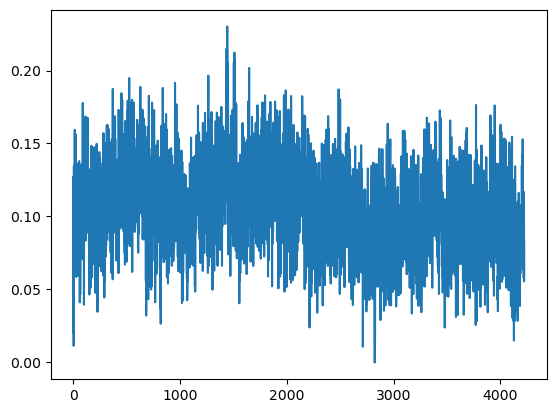

In [93]:
plt.plot(real_data[:, neuron_to_idx['AVAL']])

In [79]:
smooth_real_data.shape

torch.Size([3721, 116])

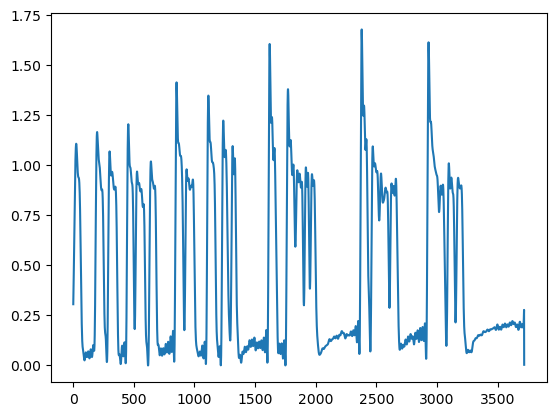

In [80]:
plt.plot(smooth_real_data[:, neuron_to_idx['AVAL']])

In [81]:
data_dict

{'worm0': {'dataset': 'Nichols2017',
  'worm': 'worm0',
  'calcium_data': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
  'smooth_calcium_data': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
  'residual_calcium': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
  'smooth_resid

In [82]:
data_dict["worm0"]["named_neuron_to_slot"]["AVAL"]

53

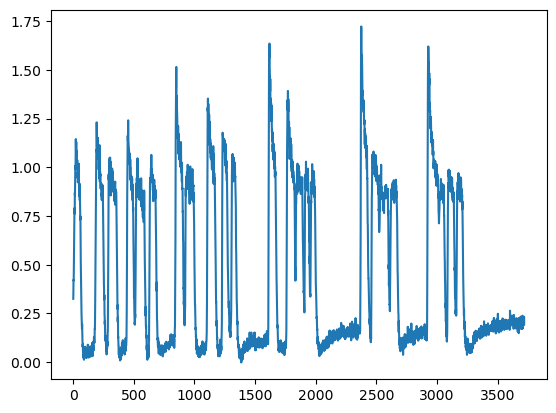

In [83]:
plt.plot(data_dict["worm0"]["calcium_data"][:, 53])